In [1]:

import pandas as pd

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import prepare

In [65]:
def train_val_test(df, target, seed=42):
    
    train, val_test = train_test_split(df, train_size=0.7, random_state=seed, stratify=df[target])
    
    val, test = train_test_split(val_test, train_size=0.5, random_state=seed, stratify=val_test[target])
    
    return train, val, test

In [66]:
titanic = pd.read_csv('titanic.csv')

In [67]:
titanic.columns = [col.lower().replace('.', '_') for col in titanic]

In [68]:
titanic

,unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [69]:
cols_to_drop = ['passenger_id', 'unnamed: 0', 'pclass', 'fare', 'embarked','embark_town', 'deck']
titanic.drop(columns = cols_to_drop, inplace = True)

In [70]:
titanic

,survived,sex,age,sibsp,parch,class,alone
0,0,male,22.0,1,0,Third,0
1,1,female,38.0,1,0,First,0
2,1,female,26.0,0,0,Third,1
3,1,female,35.0,1,0,First,0
4,0,male,35.0,0,0,Third,1
...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,Second,1
887,1,female,19.0,0,0,First,1
888,0,female,NaN,1,2,Third,0
889,1,male,26.0,0,0,First,1


In [71]:
dummies = pd.get_dummies(titanic[['sex', 'age', 'class', 'alone']], drop_first = True)

In [72]:
titanic = pd.concat([titanic, dummies], axis = 1)

In [73]:
pd.concat([titanic, dummies], axis = 1)

,survived,sex,age,sibsp,parch,class,alone,age,alone,sex_male,class_Second,class_Third,age,alone,sex_male,class_Second,class_Third
0,0,male,22.0,1,0,Third,0,22.0,0,1,0,1,22.0,0,1,0,1
1,1,female,38.0,1,0,First,0,38.0,0,0,0,0,38.0,0,0,0,0
2,1,female,26.0,0,0,Third,1,26.0,1,0,0,1,26.0,1,0,0,1
3,1,female,35.0,1,0,First,0,35.0,0,0,0,0,35.0,0,0,0,0
4,0,male,35.0,0,0,Third,1,35.0,1,1,0,1,35.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,Second,1,27.0,1,1,1,0,27.0,1,1,1,0
887,1,female,19.0,0,0,First,1,19.0,1,0,0,0,19.0,1,0,0,0
888,0,female,NaN,1,2,Third,0,NaN,0,0,0,1,NaN,0,0,0,1
889,1,male,26.0,0,0,First,1,26.0,1,1,0,0,26.0,1,1,0,0


In [74]:
titanic

,survived,sex,age,sibsp,parch,class,alone,age,alone,sex_male,class_Second,class_Third
0,0,male,22.0,1,0,Third,0,22.0,0,1,0,1
1,1,female,38.0,1,0,First,0,38.0,0,0,0,0
2,1,female,26.0,0,0,Third,1,26.0,1,0,0,1
3,1,female,35.0,1,0,First,0,35.0,0,0,0,0
4,0,male,35.0,0,0,Third,1,35.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,Second,1,27.0,1,1,1,0
887,1,female,19.0,0,0,First,1,19.0,1,0,0,0
888,0,female,NaN,1,2,Third,0,NaN,0,0,0,1
889,1,male,26.0,0,0,First,1,26.0,1,1,0,0


In [75]:
titanic.drop(columns= [ 'sex', 'age', 'class', 'alone'], inplace = True)
titanic.head()

,survived,sibsp,parch,sex_male,class_Second,class_Third
0,0,1,0,1,0,1
1,1,1,0,0,0,0
2,1,0,0,0,0,1
3,1,1,0,0,0,0
4,0,0,0,1,0,1


In [76]:
titanic['survived'] = np.where(titanic['survived'] == True, 'True', 'False')

In [77]:
titanic

,survived,sibsp,parch,sex_male,class_Second,class_Third
0,False,1,0,1,0,1
1,True,1,0,0,0,0
2,True,0,0,0,0,1
3,True,1,0,0,0,0
4,False,0,0,1,0,1
...,...,...,...,...,...,...
886,False,0,0,1,1,0
887,True,0,0,0,0,0
888,False,1,2,0,0,1
889,True,0,0,1,0,0


In [78]:
train, val, test = train_val_test(titanic, 'survived')
train.shape, val.shape, test.shape

((623, 6), (134, 6), (134, 6))

In [79]:
x_train = train.drop(columns = ['survived'])
y_train = train['survived']

x_val = val.drop(columns = ['survived'])
y_val = val['survived']

x_test = test.drop(columns = ['survived'])
y_test = test['survived']

In [80]:
seed = 42
clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)

In [81]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [82]:
clf.score(x_train, y_train)

0.8186195826645265

In [83]:
clf

DecisionTreeClassifier(max_depth=3, random_state=42)

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 748 to 136
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   survived      623 non-null    object
 1   sibsp         623 non-null    int64 
 2   parch         623 non-null    int64 
 3   sex_male      623 non-null    uint8 
 4   class_Second  623 non-null    uint8 
 5   class_Third   623 non-null    uint8 
dtypes: int64(2), object(1), uint8(3)
memory usage: 21.3+ KB


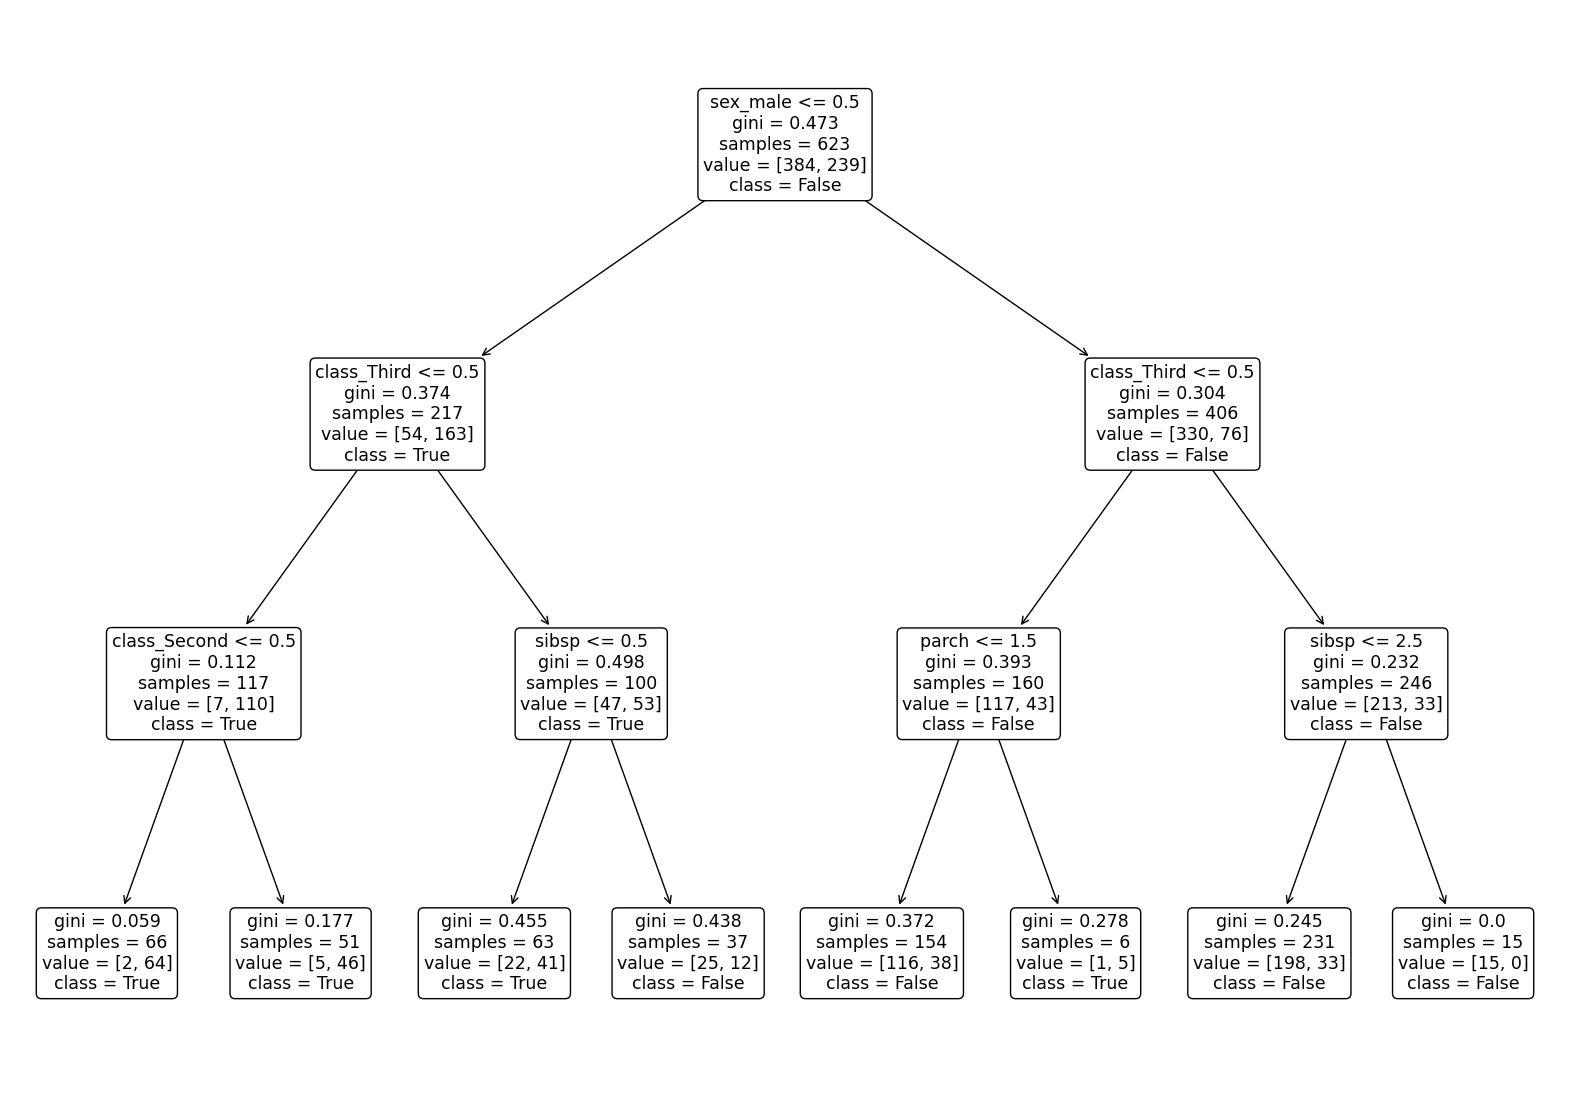

In [85]:
plt.figure(figsize=(20, 14))
plot_tree(clf, feature_names= x_train.columns, class_names = np.array(clf.classes_).astype('str').tolist(), rounded = True)
plt.show()

In [86]:
y_pred = clf.predict(x_train)
y_pred[0:5]

array(['False', 'False', 'True', 'False', 'False'], dtype=object)

In [87]:
y_pred_proba = clf.predict_proba(x_train)
y_pred_proba[0:5]

array([[0.75324675, 0.24675325],
       [0.85714286, 0.14285714],
       [0.34920635, 0.65079365],
       [0.75324675, 0.24675325],
       [0.85714286, 0.14285714]])

In [88]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

       False       0.81      0.92      0.86       384
        True       0.84      0.65      0.73       239

    accuracy                           0.82       623
   macro avg       0.82      0.79      0.80       623
weighted avg       0.82      0.82      0.81       623



In [89]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(x_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.82


In [90]:
x =confusion_matrix(y_train, y_pred)

In [93]:
prepare.print_cm_metrics(x)

Accuracy: 0.8186195826645265
True Positive Rate: 0.6527196652719666
False Positive Rate: 0.078125
True Negative Rate: 0.921875
False Negative Rate: 0.3472803347280335
Precision: 0.8387096774193549
Recall: 0.8387096774193549


In [28]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels
             , columns=labels)

,False,True
False,354,30
True,83,156


True Negative Rate: 25%
True Positive Rate: 56%
False Negative Rate: 13%
False Positive Rate: 5%

In [29]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(x_val, y_val)))

Accuracy of Decision Tree classifier on validate set: 0.81


In [30]:
# Produce y_predictions that come from the X_validate
y_pred = clf.predict(x_val)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

       False       0.79      0.93      0.85        82
        True       0.84      0.62      0.71        52

    accuracy                           0.81       134
   macro avg       0.82      0.77      0.78       134
weighted avg       0.81      0.81      0.80       134



In [31]:
seed = 42
clf = DecisionTreeClassifier(max_depth = 10, random_state = 42)

In [32]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [33]:
clf.score(x_train, y_train)

0.8378812199036918

In [34]:
clf

DecisionTreeClassifier(max_depth=10, random_state=42)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 748 to 136
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   survived      623 non-null    object
 1   sibsp         623 non-null    int64 
 2   parch         623 non-null    int64 
 3   sex_male      623 non-null    uint8 
 4   class_Second  623 non-null    uint8 
 5   class_Third   623 non-null    uint8 
dtypes: int64(2), object(1), uint8(3)
memory usage: 21.3+ KB


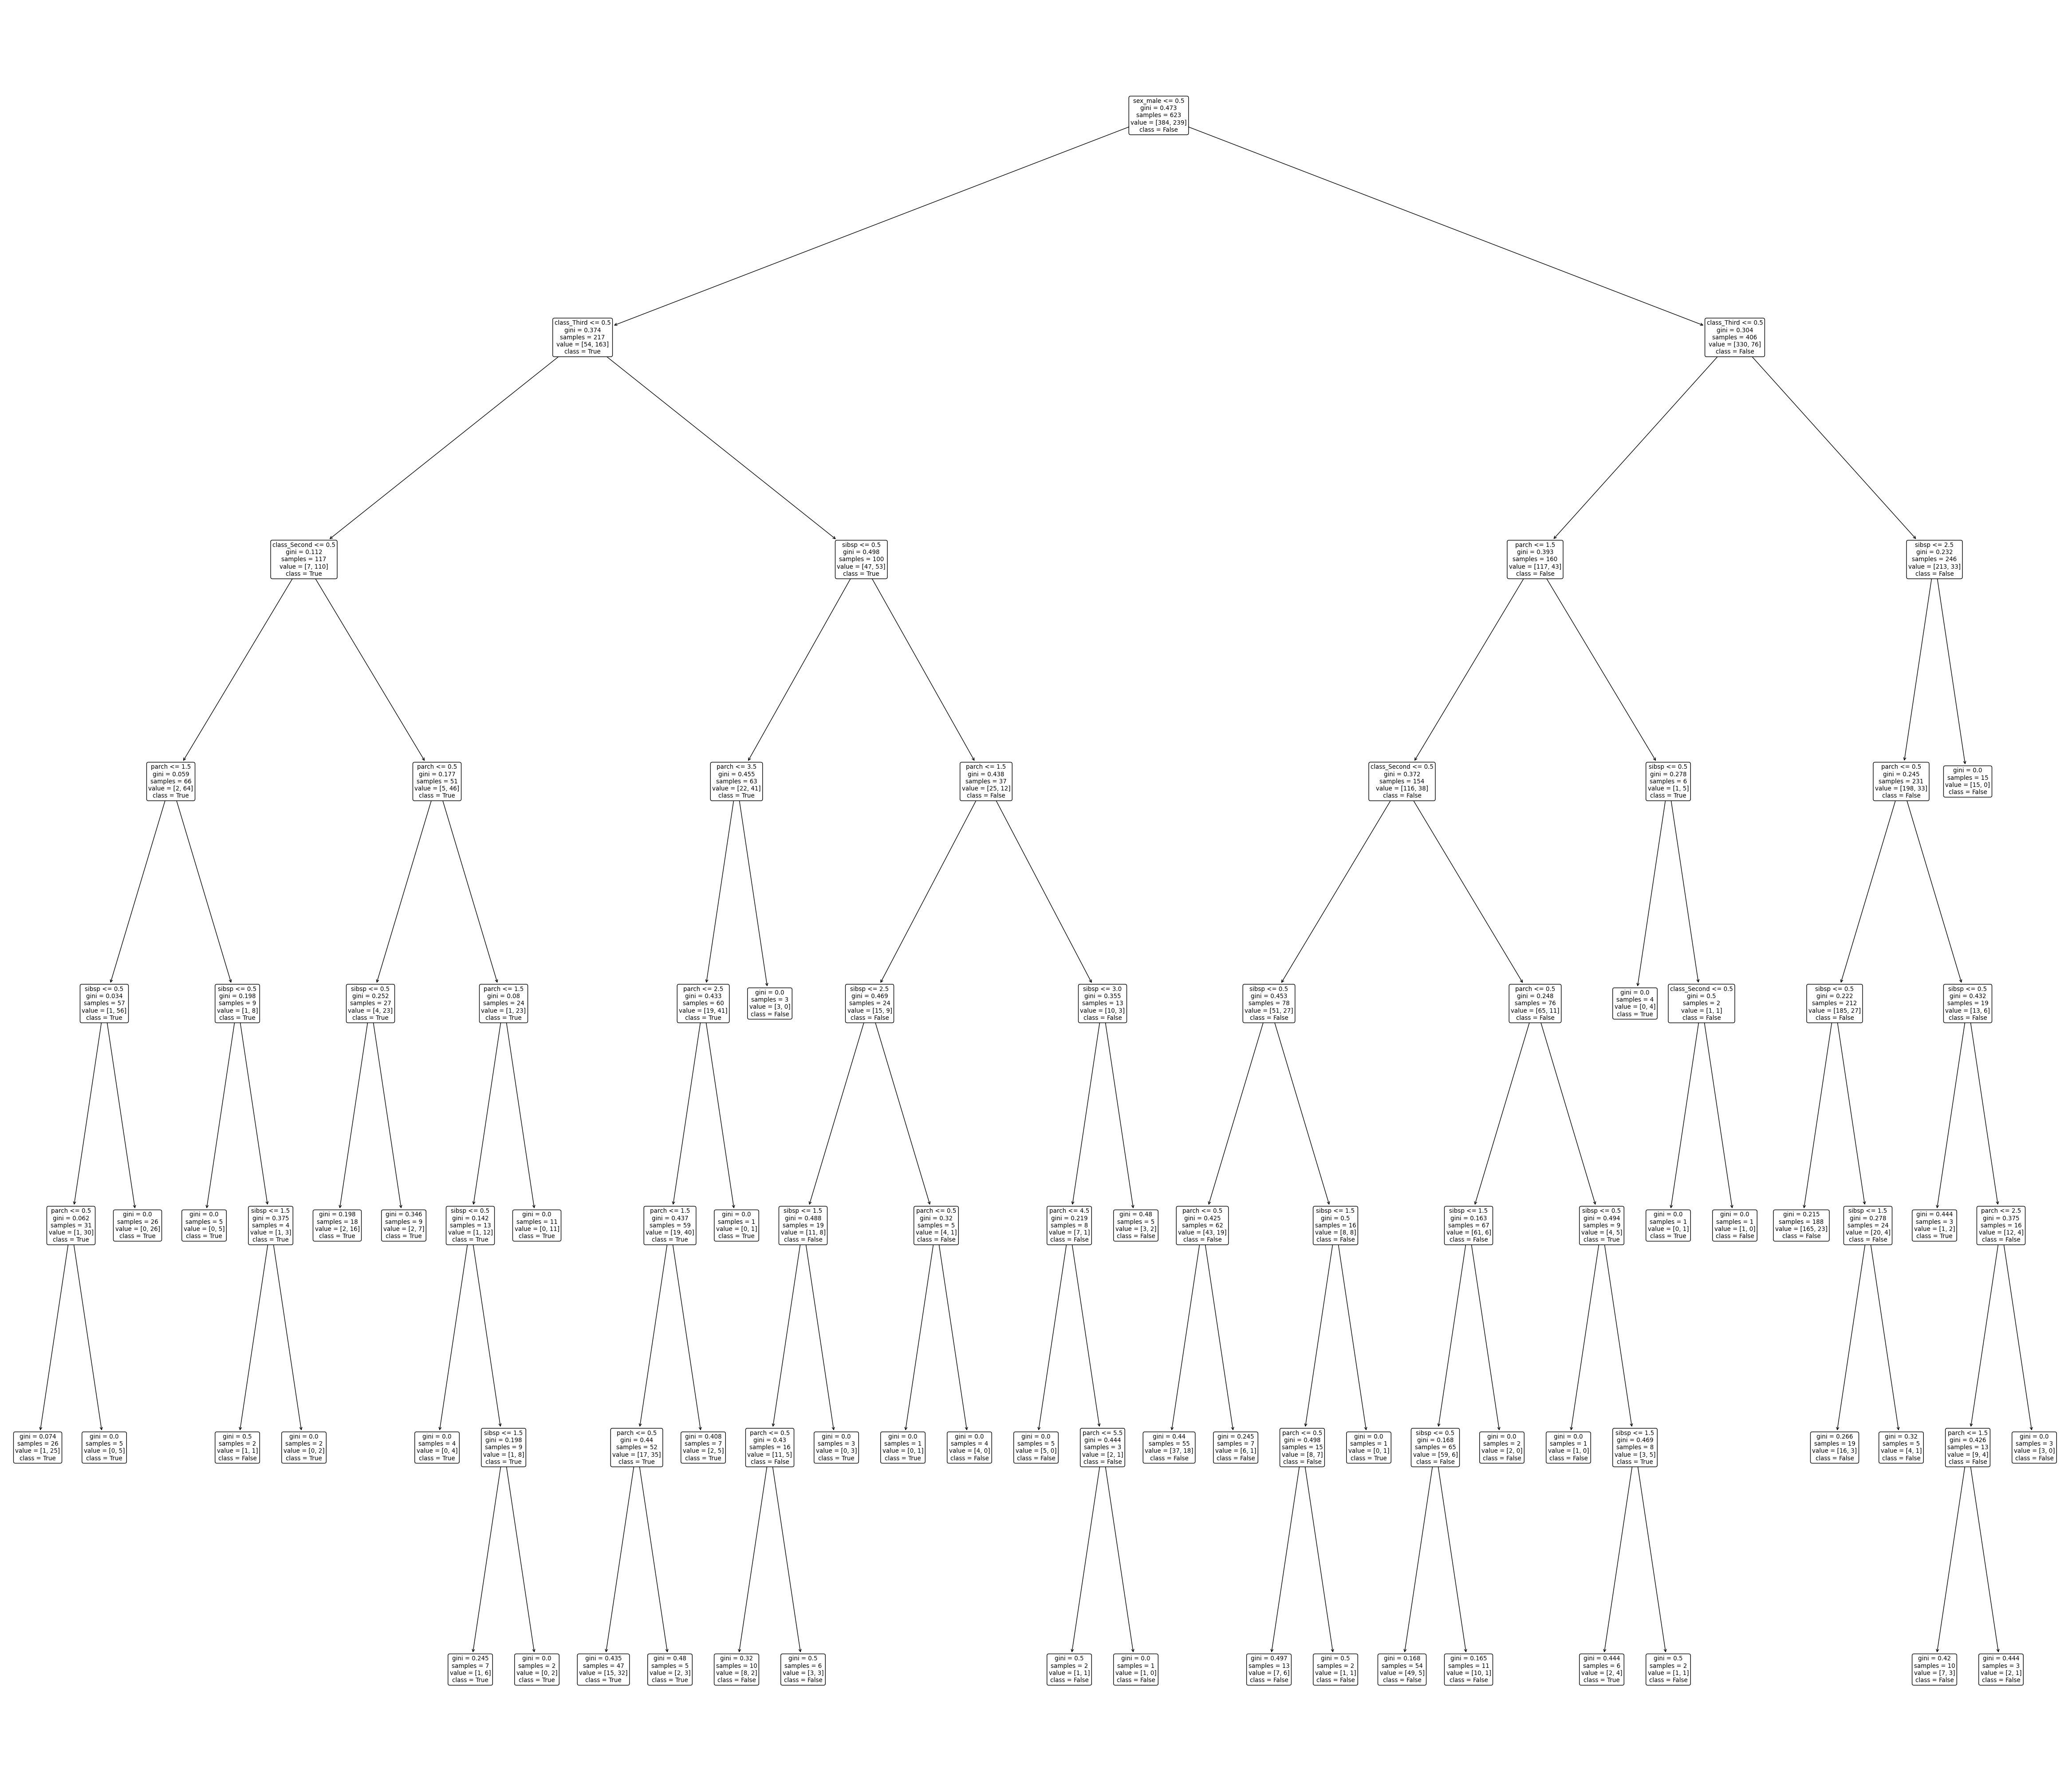

In [36]:
plt.figure(figsize=(60, 52))
plot_tree(clf, feature_names= x_train.columns, class_names = np.array(clf.classes_).astype('str').tolist(), rounded = True)
plt.show()

In [37]:
y_pred = clf.predict(x_train)
y_pred[0:5]

array(['False', 'False', 'True', 'False', 'False'], dtype=object)

In [38]:
y_pred_proba = clf.predict_proba(x_train)
y_pred_proba[0:5]

array([[0.53846154, 0.46153846],
       [0.87765957, 0.12234043],
       [0.31914894, 0.68085106],
       [0.67272727, 0.32727273],
       [0.84210526, 0.15789474]])

In [39]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

       False       0.83      0.93      0.88       384
        True       0.86      0.69      0.77       239

    accuracy                           0.84       623
   macro avg       0.84      0.81      0.82       623
weighted avg       0.84      0.84      0.83       623



In [40]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(x_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.84


In [41]:
# Produce y_predictions that come from the X_validate
y_pred = clf.predict(x_val)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

       False       0.81      0.90      0.86        82
        True       0.81      0.67      0.74        52

    accuracy                           0.81       134
   macro avg       0.81      0.79      0.80       134
weighted avg       0.81      0.81      0.81       134



In [42]:
telco = pd.read_csv('telco.csv')

In [43]:
telco.columns = [col.lower().replace('.', '_') for col in telco]

In [44]:
telco

,unnamed: 0,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,...,No,2,Yes,2,65.60,593.3,No,DSL,One year,Mailed check
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,...,Yes,1,No,2,59.90,542.4,No,DSL,Month-to-month,Mailed check
2,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,...,No,1,Yes,1,73.90,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,...,Yes,1,Yes,1,98.00,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,...,No,1,Yes,2,83.90,267.4,Yes,Fiber optic,Month-to-month,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,...,No,2,No,2,55.15,742.9,No,DSL,One year,Mailed check
7039,7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,...,Yes,1,Yes,1,85.10,1873.7,Yes,Fiber optic,Month-to-month,Electronic check
7040,7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,...,No,1,Yes,2,50.30,92.75,No,DSL,Month-to-month,Mailed check
7041,7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,...,Yes,3,No,2,67.85,4627.65,No,DSL,Two year,Mailed check


In [45]:
cols_to_drop = ['customer_id', 'unnamed: 0', 'internet_service_type_id', 'contract_type_id'
                , 'payment_type_id','monthly_charges', 'total_charges', 'tenure']
telco.drop(columns = cols_to_drop, inplace = True)

In [46]:
telco

,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,churn,internet_service_type,contract_type,payment_type
0,Female,0,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,No,Yes,No,DSL,One year,Mailed check
1,Male,0,No,No,Yes,Yes,No,No,No,No,No,Yes,No,No,DSL,Month-to-month,Mailed check
2,Male,0,No,No,Yes,No,No,No,Yes,No,No,No,Yes,Yes,Fiber optic,Month-to-month,Electronic check
3,Male,1,Yes,No,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Fiber optic,Month-to-month,Electronic check
4,Female,1,Yes,No,Yes,No,No,No,No,Yes,Yes,No,Yes,Yes,Fiber optic,Month-to-month,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,No,No,Yes,No,Yes,No,No,Yes,No,No,No,No,DSL,One year,Mailed check
7039,Male,0,Yes,No,Yes,Yes,No,No,No,No,No,Yes,Yes,Yes,Fiber optic,Month-to-month,Electronic check
7040,Male,0,No,No,Yes,No,No,Yes,No,No,No,No,Yes,No,DSL,Month-to-month,Mailed check
7041,Male,0,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,DSL,Two year,Mailed check


In [47]:
telco = telco.replace(to_replace = ['Yes', 'No','No phone service'], value = [1, 0, 0])


In [48]:
telco

,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,churn,internet_service_type,contract_type,payment_type
0,Female,0,1,1,1,0,0,1,0,1,1,0,1,0,DSL,One year,Mailed check
1,Male,0,0,0,1,1,0,0,0,0,0,1,0,0,DSL,Month-to-month,Mailed check
2,Male,0,0,0,1,0,0,0,1,0,0,0,1,1,Fiber optic,Month-to-month,Electronic check
3,Male,1,1,0,1,0,0,1,1,0,1,1,1,1,Fiber optic,Month-to-month,Electronic check
4,Female,1,1,0,1,0,0,0,0,1,1,0,1,1,Fiber optic,Month-to-month,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,0,0,1,0,1,0,0,1,0,0,0,0,DSL,One year,Mailed check
7039,Male,0,1,0,1,1,0,0,0,0,0,1,1,1,Fiber optic,Month-to-month,Electronic check
7040,Male,0,0,0,1,0,0,1,0,0,0,0,1,0,DSL,Month-to-month,Mailed check
7041,Male,0,1,1,1,0,1,0,1,1,0,1,0,0,DSL,Two year,Mailed check


In [49]:
dummies = pd.get_dummies(telco[['gender', 'internet_service_type',
                                'contract_type','payment_type']], drop_first = True)

In [50]:
dummies

,gender_Male,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,0,1
2,1,1,0,0,0,0,1,0
3,1,1,0,0,0,0,1,0
4,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
7038,0,0,0,1,0,0,0,1
7039,1,1,0,0,0,0,1,0
7040,1,0,0,0,0,0,0,1
7041,1,0,0,0,1,0,0,1


In [51]:
telco = pd.concat([telco, dummies], axis = 1)

In [52]:
telco

,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,...,contract_type,payment_type,gender_Male,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,1,1,1,0,0,1,0,1,...,One year,Mailed check,0,0,0,1,0,0,0,1
1,Male,0,0,0,1,1,0,0,0,0,...,Month-to-month,Mailed check,1,0,0,0,0,0,0,1
2,Male,0,0,0,1,0,0,0,1,0,...,Month-to-month,Electronic check,1,1,0,0,0,0,1,0
3,Male,1,1,0,1,0,0,1,1,0,...,Month-to-month,Electronic check,1,1,0,0,0,0,1,0
4,Female,1,1,0,1,0,0,0,0,1,...,Month-to-month,Mailed check,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,0,0,1,0,1,0,0,1,...,One year,Mailed check,0,0,0,1,0,0,0,1
7039,Male,0,1,0,1,1,0,0,0,0,...,Month-to-month,Electronic check,1,1,0,0,0,0,1,0
7040,Male,0,0,0,1,0,0,1,0,0,...,Month-to-month,Mailed check,1,0,0,0,0,0,0,1
7041,Male,0,1,1,1,0,1,0,1,1,...,Two year,Mailed check,1,0,0,0,1,0,0,1


In [53]:
cols_to_drop = ['gender', 'contract_type', 'payment_type', 'internet_service_type']
telco.drop(columns = cols_to_drop, inplace = True)

In [54]:
telco

,senior_citizen,partner,dependents,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,...,paperless_billing,churn,gender_Male,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,1,1,1,0,0,1,0,1,1,...,1,0,0,0,0,1,0,0,0,1
1,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,1,0,0,...,1,1,1,1,0,0,0,0,1,0
3,1,1,0,1,0,0,1,1,0,1,...,1,1,1,1,0,0,0,0,1,0
4,1,1,0,1,0,0,0,0,1,1,...,1,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
7039,0,1,0,1,1,0,0,0,0,0,...,1,1,1,1,0,0,0,0,1,0
7040,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
7041,0,1,1,1,0,1,0,1,1,0,...,0,0,1,0,0,0,1,0,0,1


In [55]:
telco = telco.replace(to_replace = 'No internet service', value = 0)

In [56]:
train, val, test = train_val_test(telco
                                  , 'churn')
train.shape, val.shape, test.shape

((4930, 21), (1056, 21), (1057, 21))

In [57]:
x_train = train.drop(columns = ['churn'])
y_train = train['churn']

x_val = val.drop(columns = ['churn'])
y_val = val['churn']

x_test = test.drop(columns = ['churn'])
y_test = test['churn']

In [58]:
seed = 42
clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)

In [59]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [60]:
clf.score(x_train, y_train)

0.7681541582150101

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 5609 to 5679
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   senior_citizen                        4930 non-null   int64
 1   partner                               4930 non-null   int64
 2   dependents                            4930 non-null   int64
 3   phone_service                         4930 non-null   int64
 4   multiple_lines                        4930 non-null   int64
 5   online_security                       4930 non-null   int64
 6   online_backup                         4930 non-null   int64
 7   device_protection                     4930 non-null   int64
 8   tech_support                          4930 non-null   int64
 9   streaming_tv                          4930 non-null   int64
 10  streaming_movies                      4930 non-null   int64
 11  paperless_billing                     49

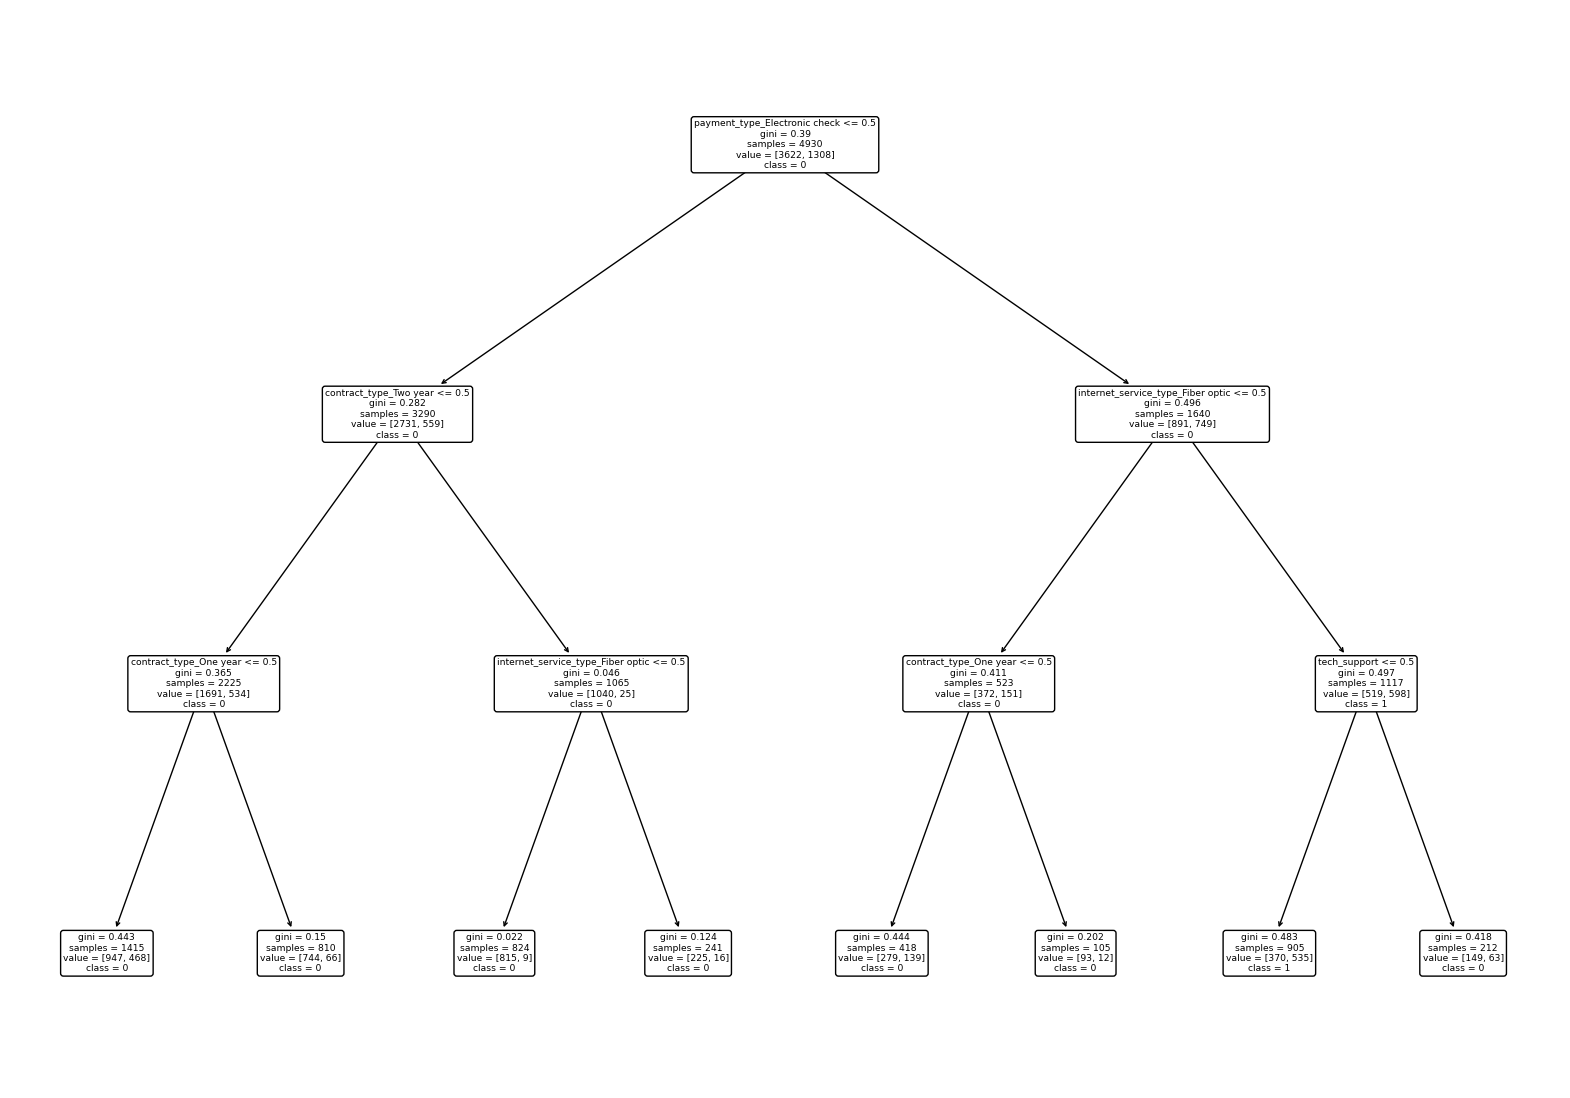

In [62]:
plt.figure(figsize=(20, 14))
plot_tree(clf, feature_names= x_train.columns, class_names = np.array(clf.classes_).astype('str').tolist(), rounded = True)
plt.show()